#objective and goal:
- this ml project is tpo predict if a person is making more then 50k a year or not given their demographic variations. To achieve this  we will use different classification algorthms and choose the best one out of it.

- dependant variable = income

## importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
data=pd.read_csv("adult.csv",na_values='?')
# because i have ? values in my data ---> converting them to null values
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

##EDA

In [4]:
data.shape

(48842, 15)

In [5]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# i will drop them

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [10]:
# convert income column to 0 and 1
# <=50--> 0
# >50k--> 1

In [11]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [12]:
data['income']=data.income.map({'<=50K':0,'>50K':1})

In [13]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


###summary stats for numeric attriutes

In [14]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

In [15]:
data_num = data.drop(['income'],axis=1)
data_num.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- mean = 40
- range = 1 - 99
- 75% of people spend 45 hours and less
- iqr is very less --> 50% 40-45 hours
- data is sparse --> 25% -75%
- symmetric
- 99 hr/wk -> rare

- sampling weight corresponding to observations
- right skewed

- mean is 38 average
- std is 13.2 -> deviation from the mean
- range of age in my data is between 17 - 90 years
- 25% -> 28 --> 25% of observation is lying below 28 years
- 75% of the observation values of age is less than 47 years
- difference b/w 1st quantile and min is less --> data after 48 is dispersed
- right skewed

###summary stats for cat variables

In [16]:
data.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


- native country has max unique values
- native country is biaed toards US --> 41292 times out of 45222 times
- occupation is kind of uniformally distributed
- race is biased
- work class --> private

### Univariate analysis

####distribution

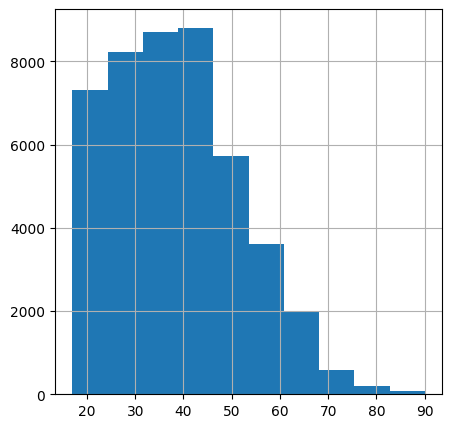

In [17]:
data['age'].hist(figsize=(5,5))
plt.show()

####description for plot

- not symmetric
- right skewed
- 17-90 is the range
- after 70 years very less ppl are working
- 20-50 earning

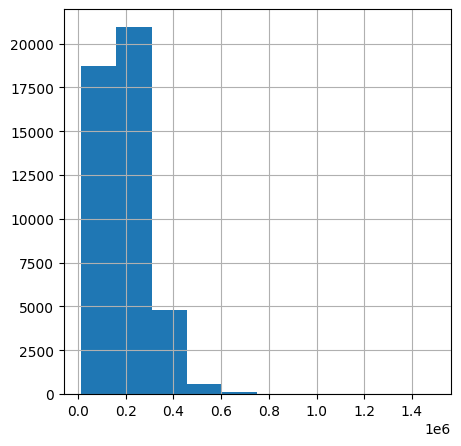

In [18]:
data['fnlwgt'].hist(figsize=(5,5))
plt.show()

- right skewed
- 0.1-0.7
- mean > median ---> right skewed
- The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US.
- From census.gov: A respondent with a final person weight of 3,600 represents 3,600 people in the U.S. population for the reference month, whereas a respondent with a weight of 7,200 represents 7,200 people.


In [19]:
data['fnlwgt'].mean()

189734.7343107337

In [20]:
data['fnlwgt'].median()

178316.0

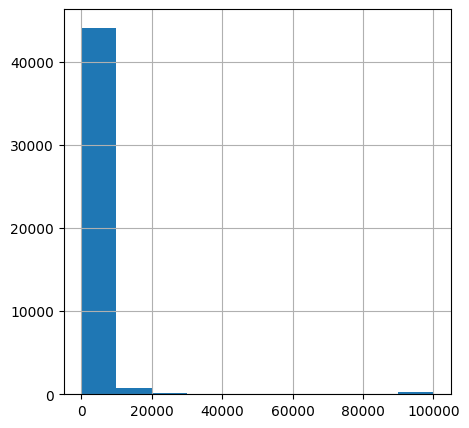

In [21]:
data['capital-gain'].hist(figsize=(5,5))
plt.show()

- 0 or 10k
- there is no cap gain but if there is any its a huge gain

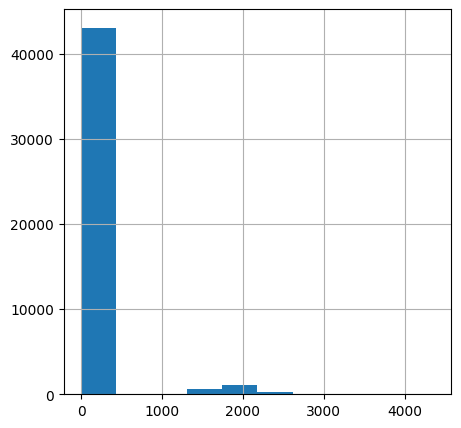

In [22]:
data['capital-loss'].hist(figsize=(5,5))
plt.show()

#### relationship b/w capital gain n loss

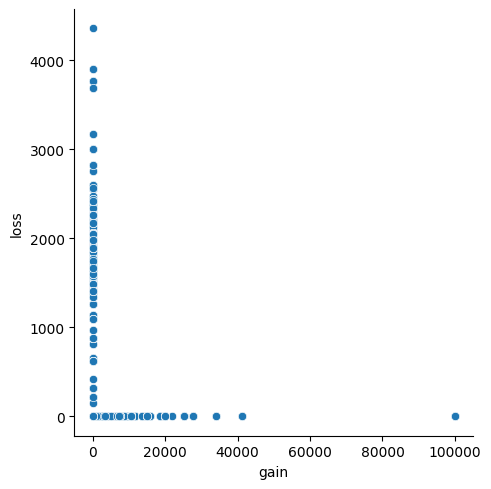

In [23]:
sns.relplot(x='capital-gain',y='capital-loss',data=data)
plt.xlabel('gain')
plt.ylabel('loss')
plt.show()


- both gain and loss can be 0
- gain 0 --> loss can be 0 or higher
- loss 0 --> gain can be 0 or higher

### bivariate analysis

In [24]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

####plot

In [25]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

- numeric bivariate analysis(age column)

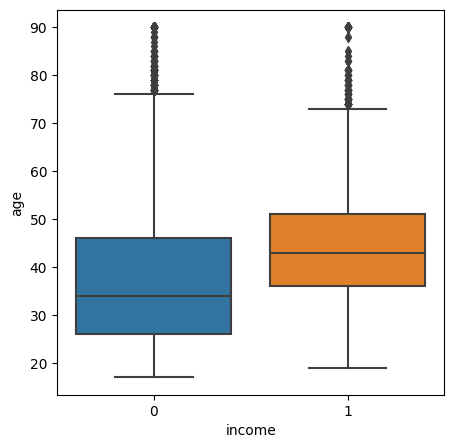

In [26]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=data)
plt.show()

Description:
- avg ppl earning more than 50k --> 40-50 yrs
- avg ppl who earn less -----> 35 years of age
- outliers
- iqr <50 --> 25-45 (longer range)
- iqr >50 ---> 35-55(shorter range)



Hypothesis testing --> 2 sample t test
 - if there is any association b/w age and income

- null hypothesis - mean of age is same for income group of >50k and less then 50k
- alt hypothesis : there is a difference b/w mean of age for income group of >50k and less then 50k

In [27]:
import random
data=data[(np.abs(stats.zscore(data['age']))<3)]

i_0=data[data['income']==0]['age']
i_1=data[data['income']==1]['age']


i_0=i_0.values.tolist()
i_0=random.sample(i_0,100)

i_1=i_1.values.tolist()
i_1=random.sample(i_1,100)

In [28]:
ttest,pval=ttest_ind(i_1,i_0,equal_var=False)
if pval<0.05:
  print("reject null hypo")
else:
  print("accept null hypo")

reject null hypo


categorical

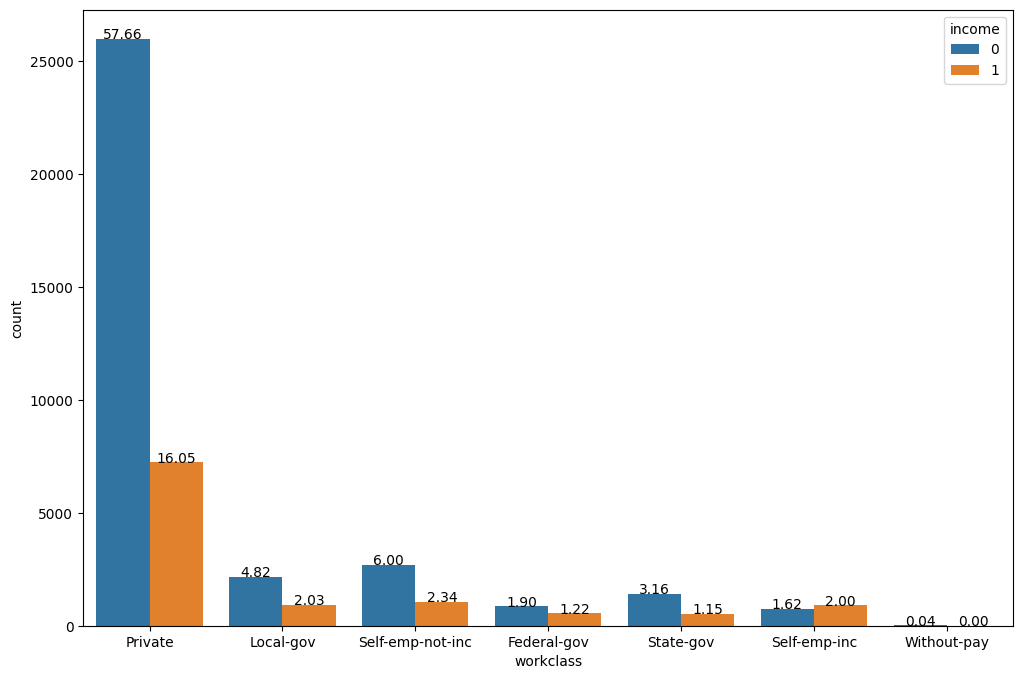

In [29]:
plt.figure(figsize=(12,8))
total=float(len(data['income']))

ax=sns.countplot(x='workclass',hue='income',data=data)
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

In [30]:
c_t=pd.crosstab(data['workclass'].sample(frac=0.002,replace=True,random_state=2),data['income'].sample(frac=0.002,replace=True,random_state=2),margins=False)

In [31]:
c_t

income,0,1
workclass,,
Federal-gov,1,3
Local-gov,8,1
Private,61,10
Self-emp-inc,1,0
Self-emp-not-inc,3,0
State-gov,2,0


- null = there is no relationship b/w workclass and income
- alt = there is relationship

In [32]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [33]:
stats,p,dof,expected=chi2_contingency(c_t)


In [34]:
prob = 0.95
critical=chi2.ppf(prob,dof)


In [35]:
if abs(stats)>=critical:
  print("dependant (rejecting null hypo)")
else:
  print("indep(acept null hypo)")

dependant (rejecting null hypo)


30-12-2023

###Multi Variate Relationship Analysis

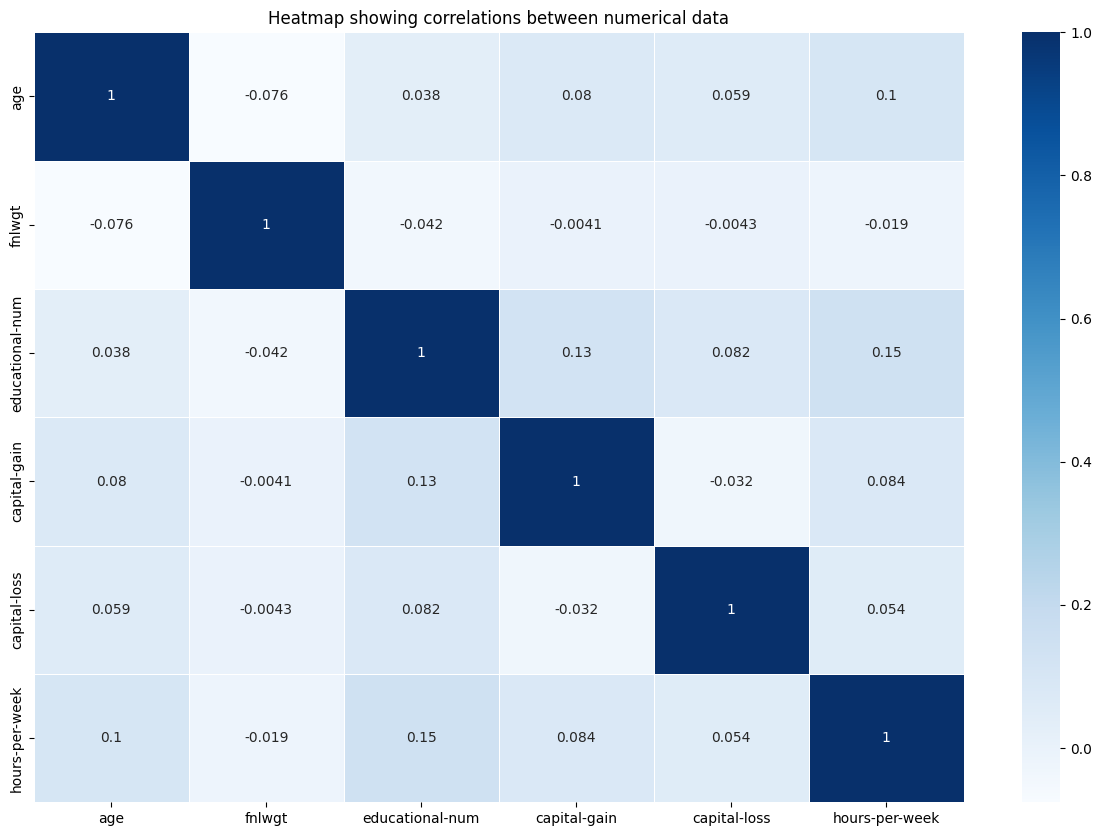

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

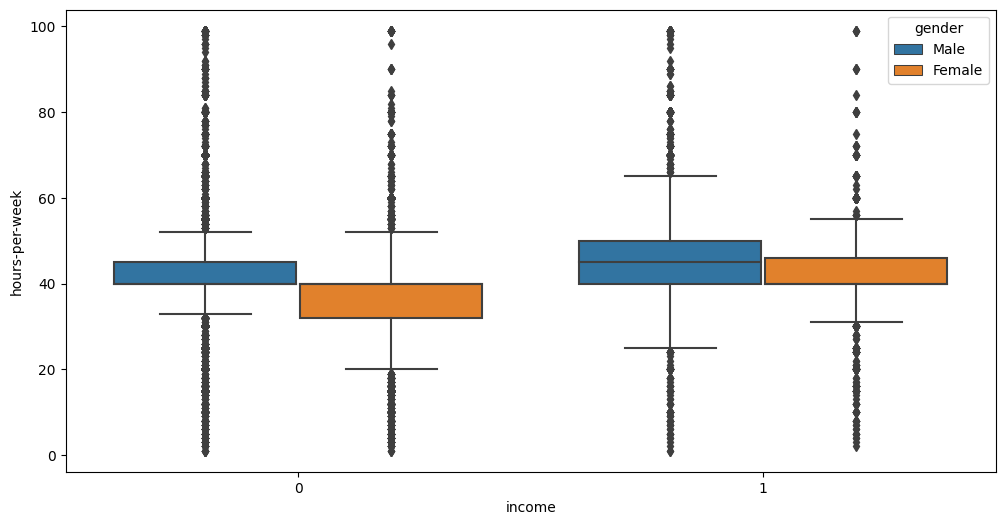

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=data)
plt.show()

###making new variables

In [38]:
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()

count    45059.000000
mean      1009.860783
std       7525.124139
min      -3900.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_change, dtype: float64

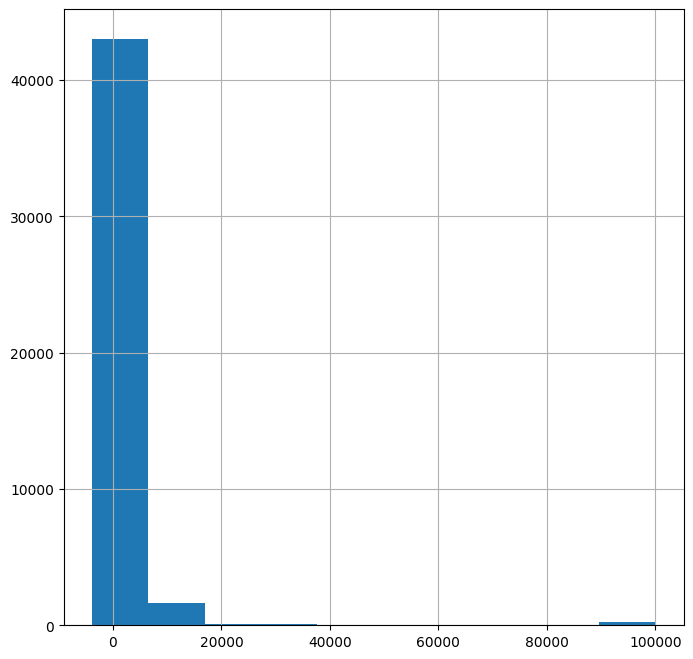

In [39]:
data["capital_change"].hist(figsize=(8,8))
plt.show()

- Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.
- Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [43]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital_change
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,7688
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0


In [45]:
income_1 = data[data['income']==1]["capital_change"]
income_0 = data[data['income']==0]["capital_change"]

#data = data[(np.abs(stats.zscore(data["age"])) < 3)]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 50)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 50)

ttest,pval = ttest_ind(income_1,income_0, equal_var=0)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 1.7814926515934821
p-value 0.08098839123302042
we accept null hypothesis


###feature selection

In [46]:
data["marital-status"]. value_counts()

Married-civ-spouse       20978
Never-married            14571
Divorced                  6289
Separated                 1410
Widowed                   1232
Married-spouse-absent      547
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [47]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'capital_change'],
      dtype='object')

In [48]:
# Convert Sex value to 0 and 1
data["gender"] = data["gender"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
data["marital-status"] = data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital-status"] = data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital-status"] = data["marital-status"].map({"Married":1, "Single":0})
data["marital-status"] = data["marital-status"].astype(int)

# Drop the data you don't want to use
data.drop(labels=["workclass","education","occupation","relationship","race","native-country", "capital_change"], axis = 1, inplace = True)

In [49]:
data.head()

,age,fnlwgt,educational-num,marital-status,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,0,0,40,0
1,38,89814,9,1,0,0,0,50,0
2,28,336951,12,1,0,0,0,40,1
3,44,160323,10,1,0,7688,0,40,1
5,34,198693,6,0,0,0,0,30,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45059 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45059 non-null  int64
 1   fnlwgt           45059 non-null  int64
 2   educational-num  45059 non-null  int64
 3   marital-status   45059 non-null  int64
 4   gender           45059 non-null  int64
 5   capital-gain     45059 non-null  int64
 6   capital-loss     45059 non-null  int64
 7   hours-per-week   45059 non-null  int64
 8   income           45059 non-null  int64
dtypes: int64(9)
memory usage: 3.4 MB


###model building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
a = data.values
X = a[:,0:8]
Y = a[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size)

Split Data: X
[[    25 226802      7 ...      0      0     40]
 [    38  89814      9 ...      0      0     50]
 [    28 336951     12 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 1 ... 0 0 1]


In [53]:
# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.792077 (0.006513)
KNN: 0.771465 (0.005684)
CART: 0.807030 (0.003866)
NB: 0.788914 (0.007457)
RF: 0.838627 (0.006757)


In [54]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 83.44429649356414%
[[6150  603]
 [ 889 1370]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6753
           1       0.69      0.61      0.65      2259

    accuracy                           0.83      9012
   macro avg       0.78      0.76      0.77      9012
weighted avg       0.83      0.83      0.83      9012



- model=RandomForestClassifier()
- kfolds=KFold(n_split=10)
- p=dict(n_estimators=n_estimators,max_features=max_features)
- param_grid= GridSearchCV(estimator=model,param_grid=p,scoring=s,cv=kfold)